# The dataset is provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities and the objective of this task is to predict the flight ticket price.



1)  Apply Suitable Machine Learning Algorithms for given the dataset and build a machine learning model that can accurately predict the price of a product based on the given factors.

2)  Apply Suitable Data Cleaning Techniques for the data set and transform the data.

3)  Perform Extensive Exploratory Data Analysis on the dataset and Share your findings.

4)  Apply Suitable Evaluation Methods for your Machine Learning Model.

5)  Note: Need to solve the above task by using atleast minimum two Machine Learning Algorithms and compare the results of all the models.

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Train Data

# Data collection

In [4]:
train_data= pd.read_excel('D://data.xlsx')

In [5]:
pd.set_option('display.max_columns',None) 

In [6]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# Looking ate the unique values of Categorical Features
print(train_data['Airline'].unique())
print(train_data['Destination'].unique())
print(train_data['Source'].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


In [10]:
train_data.describe(include = 'all')
# Price is the only integer column
# all other column are string/object type

Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count     10683        10683    10683       10682           10683   
unique      222         1343      368           5              10   
top       18:55        19:00   2h 50m      1 stop         No info   
freq        233          423      550        5625            8345   
mean        NaN          NaN      NaN         NaN             NaN   
std         NaN          NaN      NaN         NaN             NaN   
min         NaN          NaN      NaN         NaN             NaN   
25%         NaN          NaN      NaN         NaN             NaN   
50%         NaN          NaN      NaN         NaN             NaN   
75%         NaN          NaN      NaN         NaN             NaN   
max         NaN          NaN      NaN         NaN             NaN   

               Price  
count   10683.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     9087.064121  
std      4611.359167  
min      1759.000000  
25%      5277.000000  
50%      8372.000000  
75%     12373.000000  
max     79512.000000

In [11]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
42h 45m      1
42h 5m       1
40h 20m      1
33h 20m      1
31h 30m      1
Name: Duration, Length: 368, dtype: int64

In [12]:
# Dropping the NaN values
train_data.dropna(inplace=True)

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

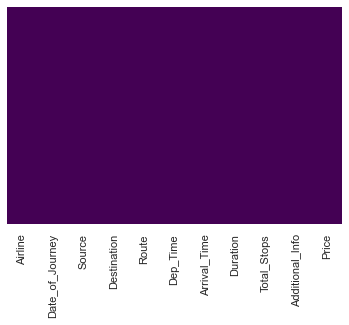

In [14]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar = False,cmap='viridis')

# Feature Engineering and EDA

In [15]:
# extracting information from 'date_of_journey' column and storing in new columns 'Journey_month' and 'journey_day'
train_data['Journey_month']= pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month

In [16]:
train_data['Journey_day']= pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [17]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_month  Journey_day  
0              3           24  
1              5            1  
2              6            9  
3              5           12  
4              3            1

In [18]:
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [19]:
# Departure time 

# Extracting Hours from 'Dep_Time' column by creating a new column 'Dep_hour'
train_data["Dep_hour"]= pd.to_datetime(train_data['Dep_Time']).dt.hour

# Extracting Minutes from 'Dep_Time' column by creating a new column 'Dep_min'
train_data["Dep_min"]= pd.to_datetime(train_data['Dep_Time']).dt.minute

# drop Dep_time columns 
train_data.drop(["Dep_Time"],axis=1,inplace=True)

In [20]:
train_data.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Journey_month  Journey_day  \
0   2h 50m    non-stop         No info   3897              3           24   
1   7h 25m     2 stops         No info   7662              5            1   
2      19h     2 stops         No info  13882              6            9   
3   5h 25m      1 stop         No info   6218              5           12   
4   4h 45m      1 stop         No info  13302              3            1   

   Dep_hour  Dep_min  
0        22       20  
1         5       50  
2         9       25  
3        18        5  
4        16       50

In [21]:

#'Arrival_time' column 

# Extracting Hours from 'Arrival_Time' column by creating a new column 'Arr_hour'
train_data["Arr_hour"]= pd.to_datetime(train_data['Arrival_Time']).dt.hour

# Extracting Minutes from 'Arrival_Time' column by creating a new column 'Arr_min'
train_data["Arr_min"]= pd.to_datetime(train_data['Arrival_Time']).dt.minute

#drop Arrival_time columns
train_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [22]:
train_data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_month  Journey_day  Dep_hour  \
0    non-stop         No info   3897              3           24        22   
1     2 stops         No info   7662              5            1         5   
2     2 stops         No info  13882              6            9         9   
3      1 stop         No info   6218              5           12        18   
4      1 stop         No info  13302              3            1        16   

   Dep_min  Arr_hour  Arr_min  
0       20         1       10  
1       50        13       15  
2       25         4       25  
3        5        23       30  
4       50        21       35

In [149]:
# count of the flight month wise

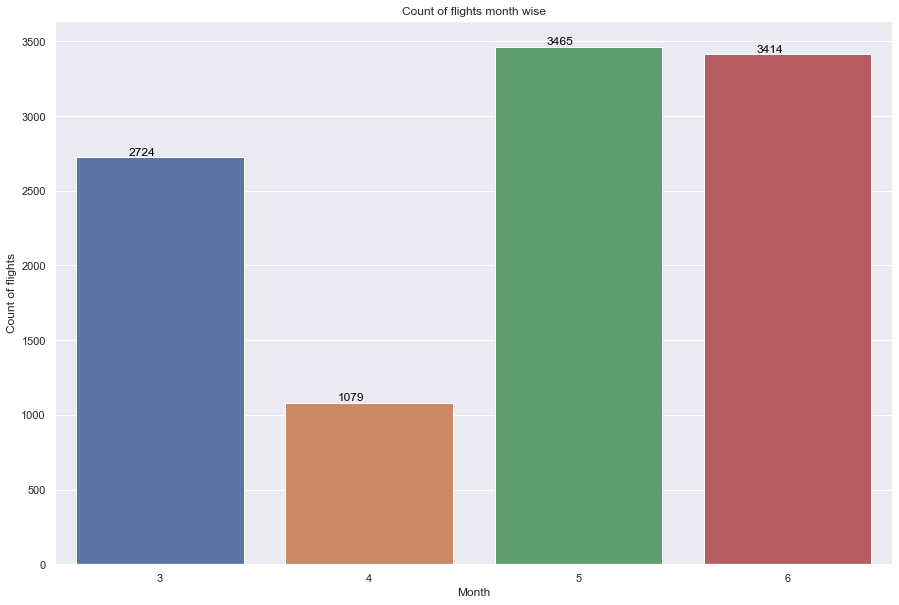

In [23]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
graph=sns.countplot(x = 'Journey_month', data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in graph.patches:   #print the text label in a particular position in the chart.
    graph.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [146]:
# fromm the above chart , we knowing month_4 (april)having less no of flights  and month_5 (may)has more

In [150]:
# count of the flights with different Airlines

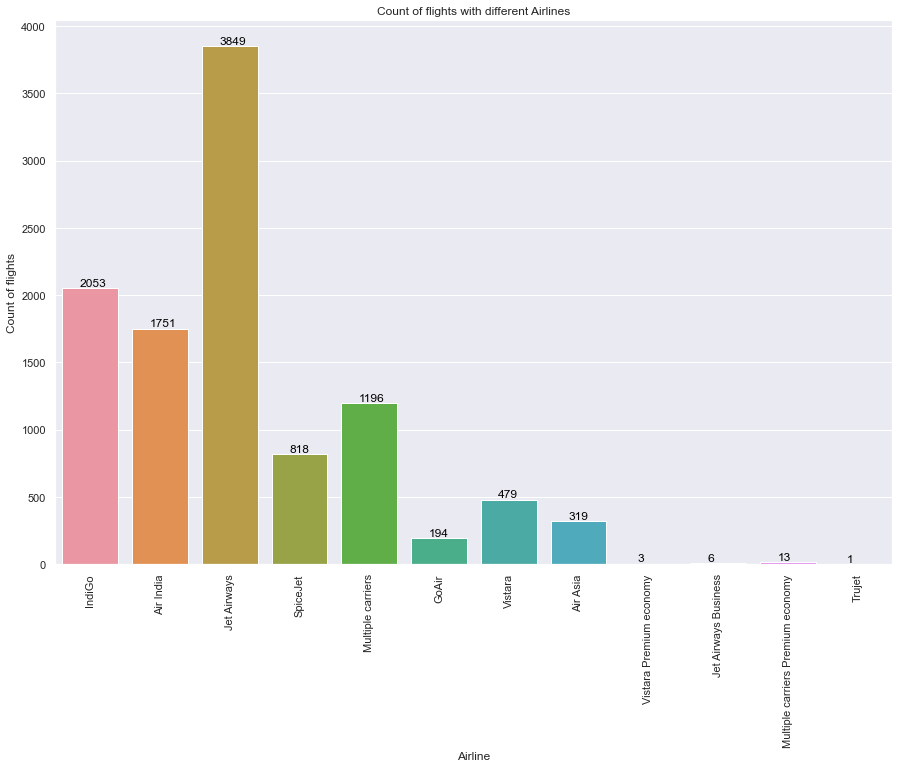

In [24]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
graph=sns.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in graph.patches:
    graph.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [147]:
##There are more number of flights of Jet Airways.
#Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

In [151]:
#price of the ticket based on total_stops.

In [153]:
sns.relplot(x = 'Total_Stops', y = 'Price' , data =train_data, kind ='line')

In [148]:
# from the above plot , we know the price variation of the ticket respect to the total_stops , its aslo deponding upon the travelling destination

In [26]:
#Duration
# It is the difference between Departure and Arrial time

duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [27]:
# adding duration_hours and duration_mins to our dataframe
train_data['Duration_hours']= duration_hours
train_data['Duration_mins']= duration_mins

In [28]:
#drop the 'Duration' column 
train_data.drop(['Duration'],axis=1,inplace=True)

In [29]:
train_data.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Journey_month  Journey_day  Dep_hour  Dep_min  \
0         No info   3897              3           24        22       20   
1         No info   7662              5            1         5       50   
2         No info  13882              6            9         9       25   
3         No info   6218              5           12        18        5   
4         No info  13302              3            1        16       50   

   Arr_hour  Arr_min  Duration_hours  Duration_mins  
0         1       10               2             50  
1        13       15               7             25  
2         4       25              19              0  
3        23       30               5             25  
4        21       35               4             45

# HANDLING CATEGORICAL DATA

In [30]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

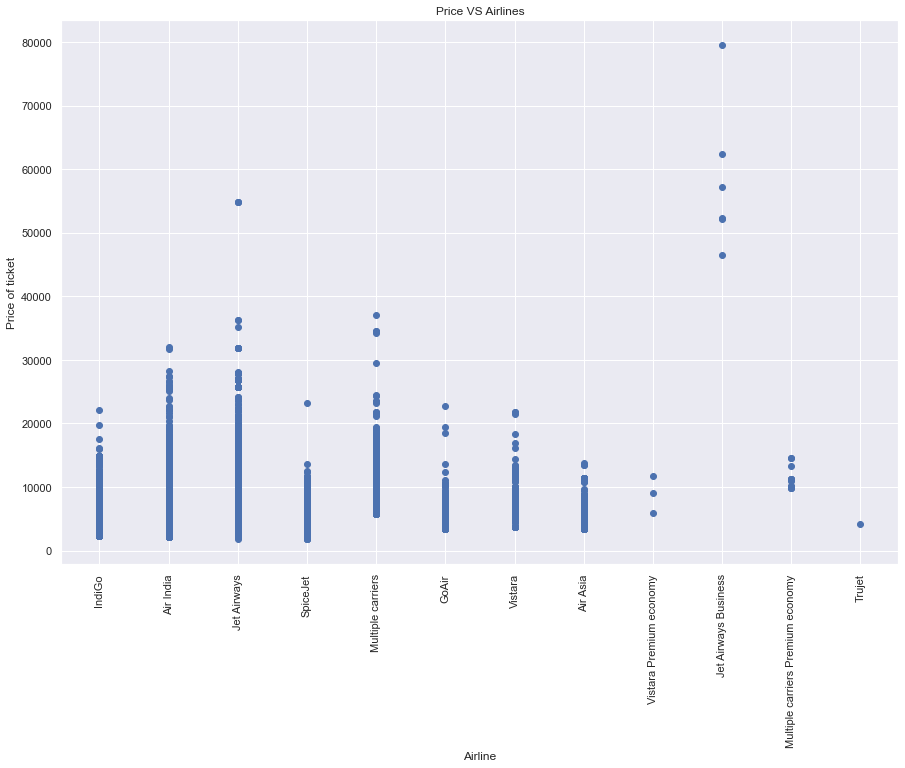

In [31]:
# AIRLINE vs PRICE
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

<function matplotlib.pyplot.show(close=None, block=None)>

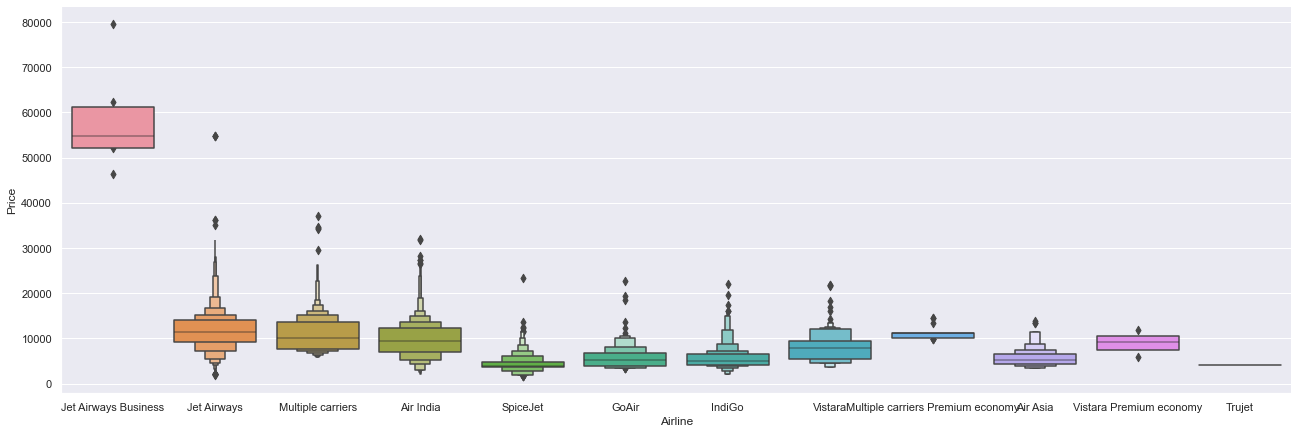

In [32]:
# AIRLINE vs PRICE
sns.catplot(y='Price',x='Airline',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

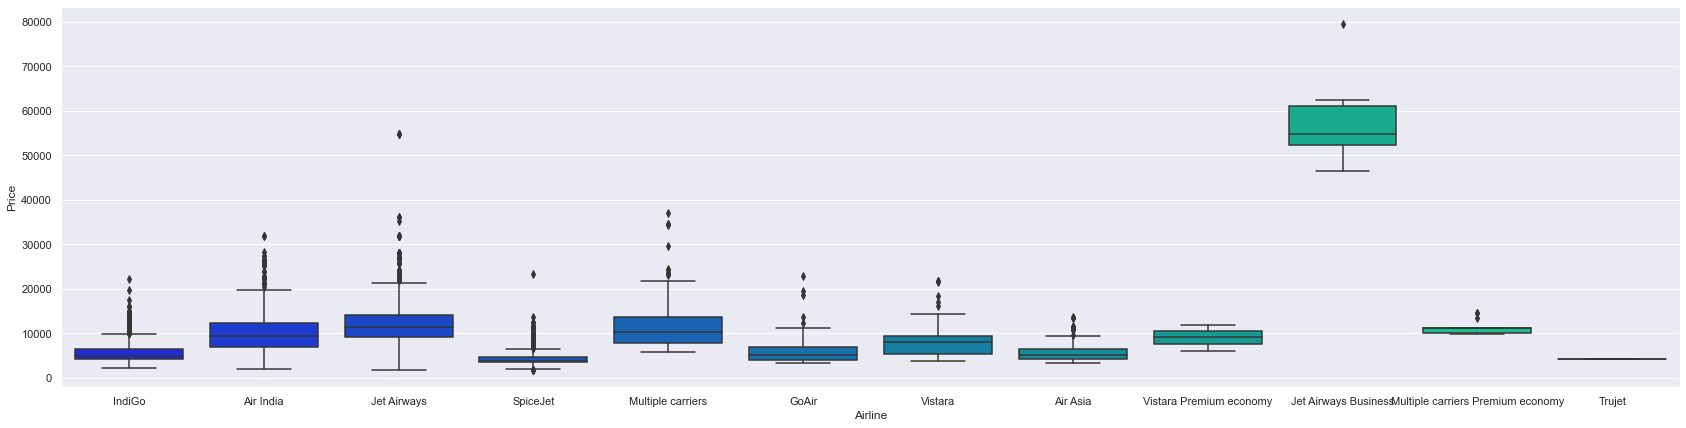

In [33]:
#using boxplot _ Airline vs Price
plt.figure(figsize=(29, 7))
sns.boxplot(x='Airline', y='Price', data = train_data,palette = 'winter')
plt.show()

In [34]:
# From above diagram Jet airways Business have the highest price &  apart from the first airline almost all are having similarmedian

In [35]:
# As Airline column has nominal Categorical data , we will perform One Hot encoding
Airline=train_data[["Airline"]]
Airline= pd.get_dummies(Airline,drop_first=True)
Airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

In [36]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

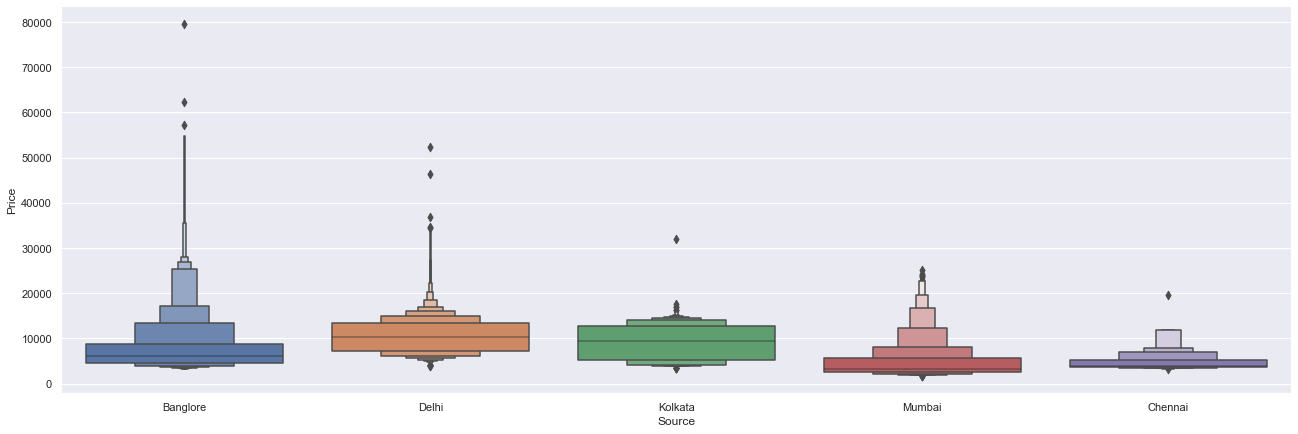

In [37]:
# Source vs PRICE
sns.catplot(y='Price',x='Source',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [38]:
# as Source column has  nominal categorical data, we will perform OneHotEncoding

Source=train_data[["Source"]]
Source= pd.get_dummies(Source,drop_first=True)
Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

In [39]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

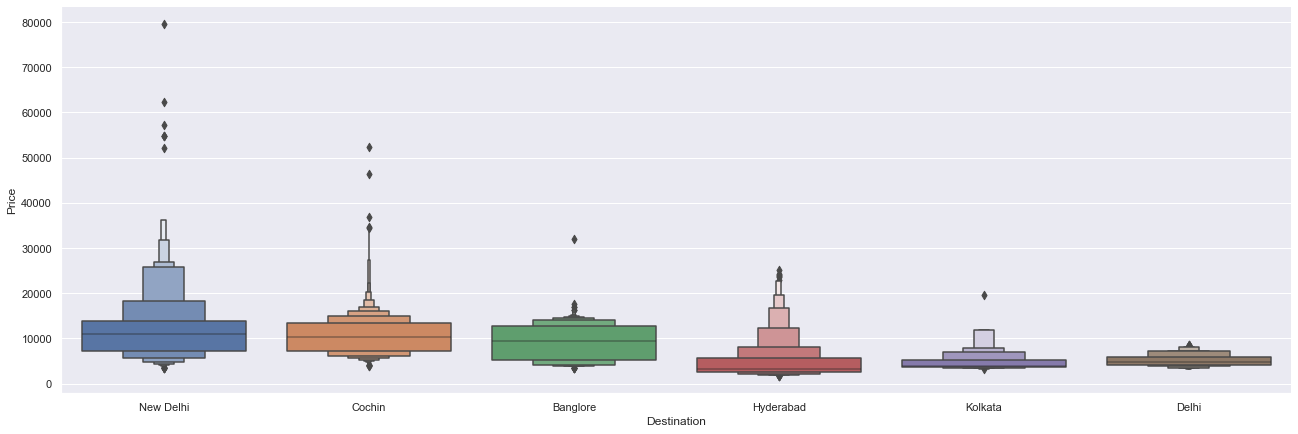

In [40]:
# Destination vs PRICE
sns.catplot(y='Price',x='Destination',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [41]:
# as Destination column has  nominal categorical data, we will perform OneHotEncoding

Destination=train_data[["Destination"]]
Destination= pd.get_dummies(Destination,drop_first=True)
Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [42]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [43]:
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [44]:
train_data.head()

Airline    Source Destination Total_Stops  Price  Journey_month  \
0       IndiGo  Banglore   New Delhi    non-stop   3897              3   
1    Air India   Kolkata    Banglore     2 stops   7662              5   
2  Jet Airways     Delhi      Cochin     2 stops  13882              6   
3       IndiGo   Kolkata    Banglore      1 stop   6218              5   
4       IndiGo  Banglore   New Delhi      1 stop  13302              3   

   Journey_day  Dep_hour  Dep_min  Arr_hour  Arr_min  Duration_hours  \
0           24        22       20         1       10               2   
1            1         5       50        13       15               7   
2            9         9       25         4       25              19   
3           12        18        5        23       30               5   
4            1        16       50        21       35               4   

   Duration_mins  
0             50  
1             25  
2              0  
3             25  
4             45

In [45]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [46]:
# As total_stops column hs Ordinal Categorical type of data, So we perform Label Encoding

train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
train_data.head()

Airline    Source Destination  Total_Stops  Price  Journey_month  \
0       IndiGo  Banglore   New Delhi            0   3897              3   
1    Air India   Kolkata    Banglore            2   7662              5   
2  Jet Airways     Delhi      Cochin            2  13882              6   
3       IndiGo   Kolkata    Banglore            1   6218              5   
4       IndiGo  Banglore   New Delhi            1  13302              3   

   Journey_day  Dep_hour  Dep_min  Arr_hour  Arr_min  Duration_hours  \
0           24        22       20         1       10               2   
1            1         5       50        13       15               7   
2            9         9       25         4       25              19   
3           12        18        5        23       30               5   
4            1        16       50        21       35               4   

   Duration_mins  
0             50  
1             25  
2              0  
3             25  
4             45

In [47]:
# Concatenate dataframe --> train_data + airline + source and destination
data_train= pd.concat([train_data,Airline,Source,Destination],axis=1)
data_train.head()

Airline    Source Destination  Total_Stops  Price  Journey_month  \
0       IndiGo  Banglore   New Delhi            0   3897              3   
1    Air India   Kolkata    Banglore            2   7662              5   
2  Jet Airways     Delhi      Cochin            2  13882              6   
3       IndiGo   Kolkata    Banglore            1   6218              5   
4       IndiGo  Banglore   New Delhi            1  13302              3   

   Journey_day  Dep_hour  Dep_min  Arr_hour  Arr_min  Duration_hours  \
0           24        22       20         1       10               2   
1            1         5       50        13       15               7   
2            9         9       25         4       25              19   
3           12        18        5        23       30               5   
4            1        16       50        21       35               4   

   Duration_mins  Airline_Air India  Airline_GoAir  Airline_IndiGo  \
0             50                  0              0               1   
1             25                  1              0               0   
2              0                  0              0               0   
3             25                  0              0               1   
4             45                  0              0               1   

   Airline_Jet Airways  Airline_Jet Airways Business  \
0                    0                             0   
1                    0                             0   
2                    1                             0   
3                    0                             0   
4                    0                             0   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                          0                                          0   
1                          0                                          0   
2                          0                                          0   
3                          0                                          0   
4                          0                                          0   

   Airline_SpiceJet  Airline_Trujet  Airline_Vistara  \
0                 0               0                0   
1                 0               0                0   
2                 0               0                0   
3                 0               0                0   
4                 0               0                0   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1

In [48]:
# dropping the unnecessary columns now
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_train.head()

Total_Stops  Price  Journey_month  Journey_day  Dep_hour  Dep_min  \
0            0   3897              3           24        22       20   
1            2   7662              5            1         5       50   
2            2  13882              6            9         9       25   
3            1   6218              5           12        18        5   
4            1  13302              3            1        16       50   

   Arr_hour  Arr_min  Duration_hours  Duration_mins  Airline_Air India  \
0         1       10               2             50                  0   
1        13       15               7             25                  1   
2         4       25              19              0                  0   
3        23       30               5             25                  0   
4        21       35               4             45                  0   

   Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              0               1                    0   
1              0               0                    0   
2              0               0                    1   
3              0               1                    0   
4              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [49]:
data_train.shape

(10682, 30)

# TEST DATA

In [50]:
# we are not combining test and train data to prevent the Data Leakage.
test_data= pd.read_excel('D://data.xlsx')
test_data = test_data.loc[0:2672,'Airline':'Additional_Info']
test_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info  
1    05:50         13:15   7h 25m     2 stops         No info  
2    09:25  04:25 10 Jun      19h     2 stops         No info  
3    18:05         23:30   5h 25m      1 stop         No info  
4    16:50         21:35   4h 45m      1 stop         No info

In [51]:
test_data.shape

(2673, 10)

In [52]:
# performing  all the steps again for the test data.

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2673 non-null   object
 1   Date_of_Journey  2673 non-null   object
 2   Source           2673 non-null   object
 3   Destination      2673 non-null   object
 4   Route            2673 non-null   object
 5   Dep_Time         2673 non-null   object
 6   Arrival_Time     2673 non-null   object
 7   Duration         2673 non-null   object
 8   Total_Stops      2673 non-null   object
 9   Additional_Info  2673 non-null   object
dtypes: object(10)
memory usage: 209.0+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [53]:
data_test.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            0           24              3        22       20             1   
1            2            1              5         5       50            13   
2            2            9              6         9       25             4   
3            1           12              5        18        5            23   
4            1            1              3        16       50            21   

   Arrival_min  Duration_hours  Duration_mins  Air India  GoAir  IndiGo  \
0           10               2             50          0      0       1   
1           15               7             25          1      0       0   
2           25              19              0          0      0       0   
3           30               5             25          0      0       1   
4           35               4             45          0      0       1   

   Jet Airways  Jet Airways Business  Multiple carriers  \
0            0                     0                  0   
1            0                     0                  0   
2            1                     0                  0   
3            0                     0                  0   
4            0                     0                  0   

   Multiple carriers Premium economy  SpiceJet  Vistara  \
0                                  0         0        0   
1                                  0         0        0   
2                                  0         0        0   
3                                  0         0        0   
4                                  0         0        0   

   Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
0                        0        0      0        0       0       0      0   
1                        0        0      0        1       0       0      0   
2                        0        0      1        0       0       1      0   
3                        0        0      0        1       0       0      0   
4                        0        0      0        0       0       0      0   

   Hyderabad  Kolkata  New Delhi  
0          0        0          1  
1          0        0          0  
2          0        0          0  
3          0        0          0  
4          0        0          1

# Feature Selection
#### Finding out the best features which will contribute and have good relation with our Target variable
Following are some feature selection methods:
1) heatmap
2) feature_importance_
3) SelectKBest

In [54]:
data_train.shape

(10682, 30)

In [55]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_month', 'Journey_day', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [56]:
# making X our independent variable
X= data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arr_hour  \
0            0           24              3        22       20         1   
1            2            1              5         5       50        13   
2            2            9              6         9       25         4   
3            1           12              5        18        5        23   
4            1            1              3        16       50        21   

   Arr_min  Duration_hours  Duration_mins  Airline_Air India  Airline_GoAir  \
0       10               2             50                  0              0   
1       15               7             25                  1              0   
2       25              19              0                  0              0   
3       30               5             25                  0              0   
4       35               4             45                  0              0   

   Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  \
0               1                    0                             0   
1               0                    0                             0   
2               0                    1                             0   
3               1                    0                             0   
4               1                    0                             0   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                          0                                          0   
1                          0                                          0   
2                          0                                          0   
3                          0                                          0   
4                          0                                          0   

   Airline_SpiceJet  Airline_Trujet  Airline_Vistara  \
0                 0               0                0   
1                 0               0                0   
2                 0               0                0   
3                 0               0                0   
4                 0               0                0   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1

In [57]:
# y will be our dependent feature
y= data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [58]:
train_data.corr()
#its shows the direction of the  magnitude, like if we have +ve value our two features will be in increasing condition,else decreasing condition. 

Total_Stops     Price  Journey_month  Journey_day  Dep_hour  \
Total_Stops        1.000000  0.603897       0.054383    -0.009451 -0.061476   
Price              0.603897  1.000000      -0.103643    -0.153774  0.006799   
Journey_month      0.054383 -0.103643       1.000000    -0.038359  0.039127   
Journey_day       -0.009451 -0.153774      -0.038359     1.000000  0.002170   
Dep_hour          -0.061476  0.006799       0.039127     0.002170  1.000000   
Dep_min           -0.002618 -0.024458      -0.059267    -0.008170 -0.024745   
Arr_hour           0.038140  0.024244      -0.003927    -0.003245  0.005180   
Arr_min           -0.106940 -0.086155      -0.100626    -0.017510  0.067911   
Duration_hours     0.739916  0.508778       0.016141    -0.022059  0.002869   
Duration_mins     -0.136706 -0.124855      -0.040897    -0.008940 -0.023707   

                 Dep_min  Arr_hour   Arr_min  Duration_hours  Duration_mins  
Total_Stops    -0.002618  0.038140 -0.106940        0.739916      -0.136706  
Price          -0.024458  0.024244 -0.086155        0.508778      -0.124855  
Journey_month  -0.059267 -0.003927 -0.100626        0.016141      -0.040897  
Journey_day    -0.008170 -0.003245 -0.017510       -0.022059      -0.008940  
Dep_hour       -0.024745  0.005180  0.067911        0.002869      -0.023707  
Dep_min         1.000000  0.043122 -0.017597       -0.022104       0.092485  
Arr_hour        0.043122  1.000000 -0.154363        0.055276      -0.118309  
Arr_min        -0.017597 -0.154363  1.000000       -0.074450       0.151628  
Duration_hours -0.022104  0.055276 -0.074450        1.000000      -0.126468  
Duration_mins   0.092485 -0.118309  0.151628       -0.126468       1.000000

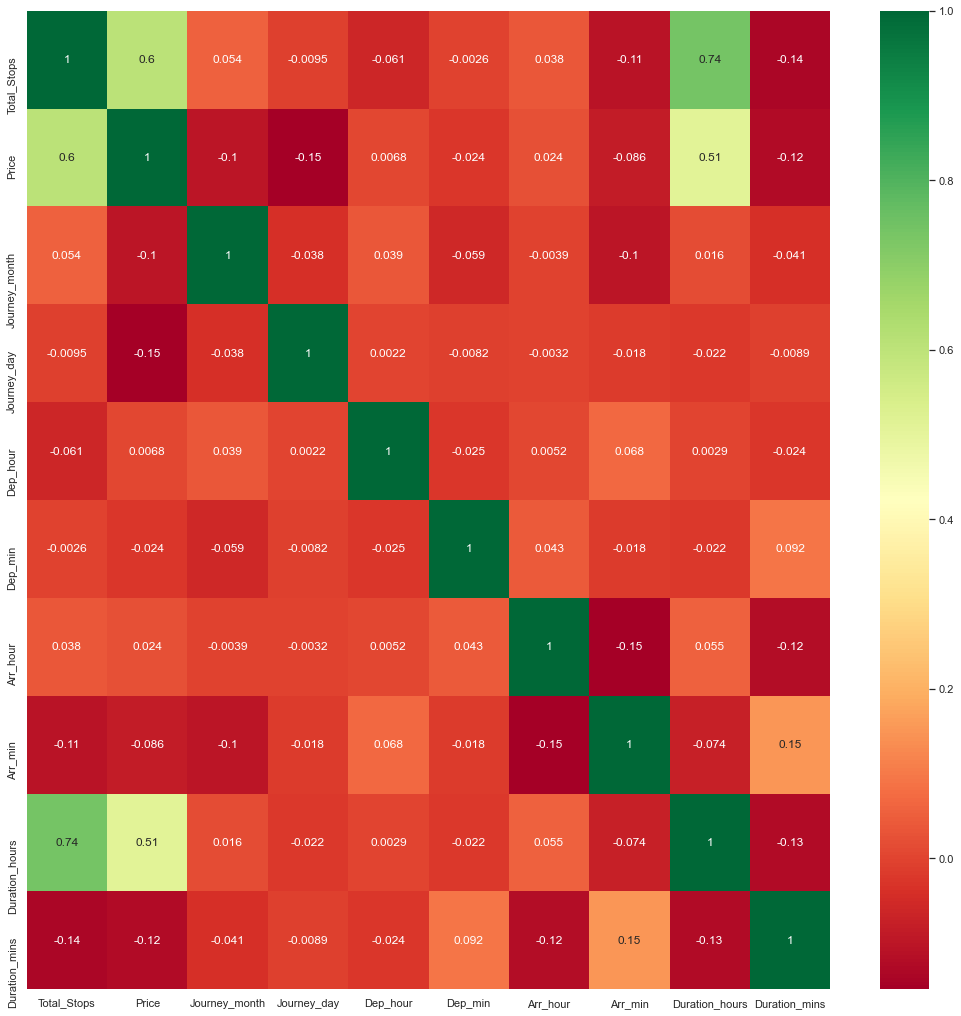

In [59]:
# Finding correlation between Independent and Dependent Feature
# it find the interrelationship between the 2 features, for this condition our features will be in int or float type for finding the correlation

plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

Extreme green means highly correlated, 
Extreme red means negatively correlated.

If two independent features are highly correlated , then we can drop any one of them as both are doing almost same task.

In [60]:
# To know the Important features using ExtraTreeRegressor 

from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [61]:
# looking at important features given bt ExtraTreesRegressor
print(selection.feature_importances_)

[2.31246456e-01 1.43648710e-01 5.33486555e-02 2.43145400e-02
 2.08005011e-02 2.81302973e-02 1.91091456e-02 1.21890505e-01
 1.77850326e-02 8.75092817e-03 1.66193628e-03 1.90251467e-02
 1.39005858e-01 6.76600281e-02 1.82647139e-02 8.81413602e-04
 2.99691561e-03 1.03483457e-04 4.74949247e-03 7.77168408e-05
 4.64490188e-04 1.03939298e-02 3.24721899e-03 6.87859201e-03
 8.32995846e-03 1.55860267e-02 5.98422231e-03 6.31770000e-04
 2.50323147e-02]


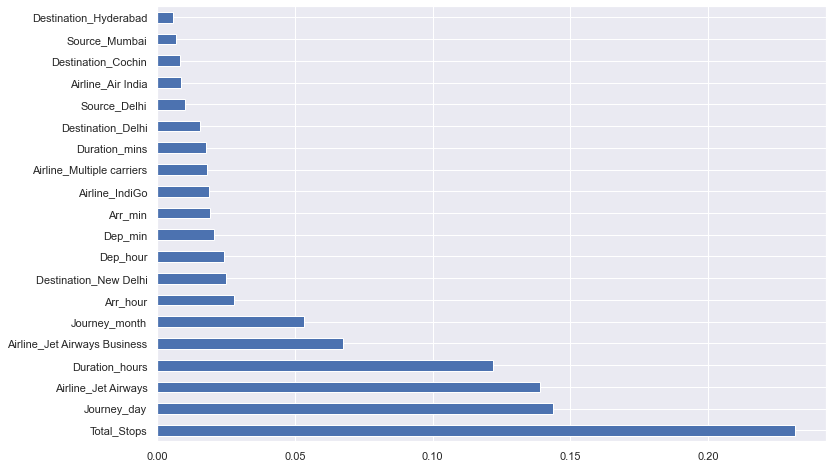

In [62]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# MODEL BUILDING

In [63]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# KNeighborsRegressor

In [156]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
k_reg = KNeighborsRegressor()
k_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [66]:
# prediction variable 'y_pred'
y_pred = k_reg.predict(X_test)

In [67]:
# Accuracy to training sets
k_reg.score(X_train,y_train)

0.7353783201025581

In [68]:
# Accuracy to test sets
k_reg.score(X_test,y_test)

0.5743709506218349

In [70]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1879.4638277959757
MSE: 9177437.535891436
RMSE: 3029.428582404846


In [72]:
# R square error
metrics.r2_score(y_test,y_pred)

0.5743709506218349

# DecisionTreeRegressor

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
tree =DecisionTreeRegressor ()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [75]:
# prediction variable 'y_pred'
y_pred= tree.predict(X_test)

In [76]:
# Accuracy to training sets
tree.score(X_train,y_train)

0.9692484150527355

In [77]:
# accuracy of Testing sets
tree.score(X_test,y_test)


0.7280523023493057

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1332.4007565122447
MSE: 5863751.57397039
RMSE: 2421.518443863352


In [79]:
# R square error
metrics.r2_score(y_test,y_pred)

0.7280523023493057

# Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
# prediction variable 'y_pred'
y_pred= reg_rf.predict(X_test)

In [82]:
# Accuracy to training sets
reg_rf.score(X_train,y_train)

0.9522976963677185

In [83]:
# accuracy of Testing sets
reg_rf.score(X_test,y_test)

0.7982772230695421

c:\users\elcot-lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


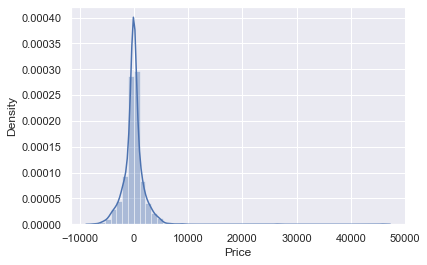

In [84]:
sns.distplot(y_test-y_pred)
plt.show()

The above plot is showing Gaussian distribution which shows that our predictions are good

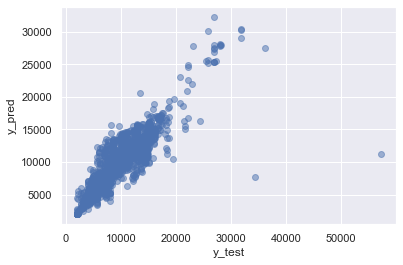

In [85]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

The linear distribution in the above scatter plot shows that our predictions are good

In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1173.8020327885993
MSE: 4349557.878040858
RMSE: 2085.559368141041


In [87]:
# R square error
metrics.r2_score(y_test,y_pred)
                

0.7982772230695421

In [88]:
### To achive more accuracy we go for hyperparameter tunig method 

# # Hyperparameter Tuning
###### There are two techniques of Hyperparameter tuning i.e 
1) RandomizedSearchCv
2) GridSearchCV
##### We use RandomizedSearchCv because it is much faster than GridSearchCV

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
# Randomized Search CV
# Number of trees in random forest
n_estimators = [100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [91]:
# create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [92]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_absolute_error', n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs =- 1)


In [93]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [96]:
# looking at best parameters
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [97]:
prediction = rf_random.predict(X_test)

c:\users\elcot-lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


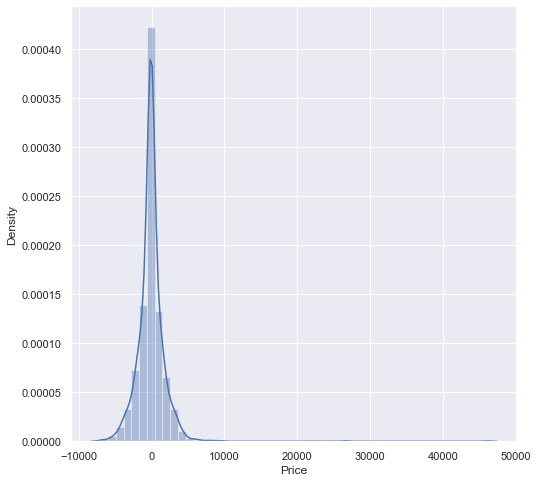

In [98]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

Gaussian distribution shows our predictions are very good

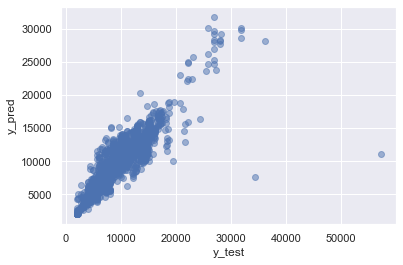

In [99]:
# plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1140.9204404719835
MSE: 4074654.159492923
RMSE: 2018.5772612146711


In [101]:
metrics.r2_score(y_test,prediction)

0.8110266433667095

In [296]:
# we get some incresese in accuracy score..(2%)

# XGBRegressor

In [102]:
from xgboost import XGBRegressor

In [107]:
xgb_rg = XGBRegressor(learning_rate = 0.4, n_estimators=100, max_depth = 6, min_child_weight=1, gamma=0, subsample=1,
                     colsample_bytree =0.8, objective = 'reg:linear', nthread = 4, scale_pos_weight=1,seed = 27, reg_alpha =0
                     ,n_jobs =2)
xgb_rg = xgb_rg.fit(X_train,y_train)


[19:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [127]:
# prediction variable 'y_pred'
y_pred= xgb_rg.predict(X_test)

In [128]:
# Accuracy to training sets
xgb_rg.score(X_train,y_train)

0.9403477560457038

In [129]:
# accuracy of Testing sets
xgb_rg.score(X_test,y_test)

0.8516219933965504

In [130]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1153.0372041408627
MSE: 3199334.9356504288
RMSE: 1788.6684812033864


c:\users\elcot-lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


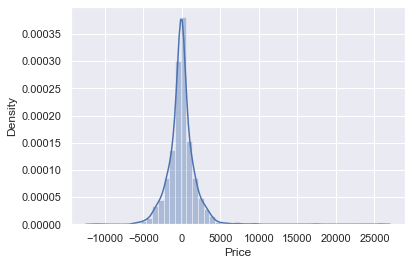

In [131]:
sns.distplot(y_test-y_pred)
plt.show()

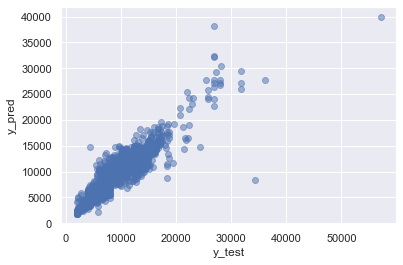

In [132]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [136]:
metrics.r2_score(y_test,y_pred)

0.8516219933965504

#  predictive_score :                       training sets          ,                             test sets 

#  KNeighborsRegressor                  0.7353                  ,                             0.5743
#  DecisionTreeRegressor                 0.969248              ,                             0.72687
#  XGB Regressor                               0.940347              ,                             0.85162
#  Random Forest Regressor            0.952826              ,                             0.81600

# By seeing the accuracy of the  above models we knowing Random Forest and mainly ' XGB Regressor ' gives good fit compared to other regressors, and the MSE,MAE,RMSE is low comapred to other models.
